# Analyzing Crime in LA

## 🌇🚔 Background

![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs!

However, as with any highely populated city, it isn't always glamarous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing their crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

You are free to use any methodologies that you like in order to produce your insights. 

# The Data

They have provided you with a single dataset to use. A summary and preview is provided below.

The data is publicly available [here](https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8).

## 👮‍♀️ crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24 hour military time. |
| `'AREA'` | The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Rpt Dist No'` | A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74ab |
| `'Crm Cd'` | Crime code for the offence committed. |
| `'Crm Cd Desc'` | Definition of the crime. |
| `'Vict Age'` | Victim Age (years) |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Premis Cd'` | Code for the type of structure, vehicle, or location where the crime took place. |
| `'Premis Desc'` | Definition of the `'Premis Cd'`. |
| `'Weapon Used Cd'` | The type of weapon used in the crime. |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'Crm Cd 1'` | Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious. |
| `'Crm Cd 2'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'Crm Cd 3'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'Crm Cd 4'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'LOCATION'` | Street address of the crime. |
| `'Cross Street'` | Cross Street of rounded Address |
| `'LAT'` | Latitude of the crime location. |
| `'LON'` | Longtitude of the crime location. |

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
crime_data = pd.read_csv('data/crimes.csv')

# Display the first few rows to understand the data structure
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,201223780,2020-11-02,11/02/2020 12:00:00 AM,1120,12,77th Street,1256,210,ROBBERY,65,...,FOLDING KNIFE,Invest Cont,210.0,NaN,NaN,NaN,73RD ST,FIGUEROA ST,33.9737,-118.2827
1,201911283,2020-06-23,06/23/2020 12:00:00 AM,315,19,Mission,1958,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",51,...,NaN,Invest Cont,740.0,998.0,NaN,NaN,9700 WOODMAN AV,NaN,34.2467,-118.4479
2,200806654,2020-02-28,02/28/2020 12:00:00 AM,1545,8,West LA,885,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),38,...,NaN,Invest Cont,420.0,NaN,NaN,NaN,10400 W PICO BL,NaN,34.0463,-118.4171
3,220912167,2022-08-03,07/26/2022 12:00:00 AM,1730,9,Van Nuys,955,901,VIOLATION OF RESTRAINING ORDER,64,...,NaN,Adult Other,901.0,NaN,NaN,NaN,14200 MAGNOLIA BL,NaN,34.1668,-118.4445
4,200817110,2020-12-02,11/27/2020 12:00:00 AM,1500,8,West LA,802,662,"BUNCO, GRAND THEFT",73,...,NaN,Invest Cont,662.0,NaN,NaN,NaN,15000 W SUNSET BL,NaN,34.0889,-118.5325


## 💪 The Challenge

* Use your skills to produce insights about crimes in Los Angeles.
* Examples could include examining how crime varies by area, crime type, victim age, time of day, and victim descent.
* You could build machine learning models to predict criminal activities, such as when a crime may occur, what type of crime, or where, based on features in the dataset.
* You may also wish to visualize the distribution of crimes on a map.

### Note:

To ensure the best user experience, we currently discourage using Folium and Bokeh in Workspace notebooks.

## ✍️ Judging criteria

This competition is for helping to understand how competitions work. This competition will not be judged.

## ✅ Checklist before publishing


* Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
* Remove redundant cells like the judging criteria, so the workbook is focused on your work.
* Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck! 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
crime_data = pd.read_csv('data/crimes.csv')

# Display the first few rows to understand the data structure
crime_data.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,201223780,2020-11-02,11/02/2020 12:00:00 AM,1120,12,77th Street,1256,210,ROBBERY,65,...,FOLDING KNIFE,Invest Cont,210.0,NaN,NaN,NaN,73RD ST,FIGUEROA ST,33.9737,-118.2827
1,201911283,2020-06-23,06/23/2020 12:00:00 AM,315,19,Mission,1958,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",51,...,NaN,Invest Cont,740.0,998.0,NaN,NaN,9700 WOODMAN AV,NaN,34.2467,-118.4479
2,200806654,2020-02-28,02/28/2020 12:00:00 AM,1545,8,West LA,885,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),38,...,NaN,Invest Cont,420.0,NaN,NaN,NaN,10400 W PICO BL,NaN,34.0463,-118.4171
3,220912167,2022-08-03,07/26/2022 12:00:00 AM,1730,9,Van Nuys,955,901,VIOLATION OF RESTRAINING ORDER,64,...,NaN,Adult Other,901.0,NaN,NaN,NaN,14200 MAGNOLIA BL,NaN,34.1668,-118.4445
4,200817110,2020-12-02,11/27/2020 12:00:00 AM,1500,8,West LA,802,662,"BUNCO, GRAND THEFT",73,...,NaN,Invest Cont,662.0,NaN,NaN,NaN,15000 W SUNSET BL,NaN,34.0889,-118.5325


Let's first check for missing values and then generate basic statistics for key columns.

In [3]:
# Check for missing values in the dataset
missing_values = crime_data.isnull().sum()

# Display basic statistics for key columns
desc_stats = crime_data[['TIME OCC', 'Vict Age']].describe()

missing_values, desc_stats


(DR_NO                  0
 Date Rptd              0
 DATE OCC               0
 TIME OCC               0
 AREA                   0
 AREA NAME              0
 Rpt Dist No            0
 Crm Cd                 0
 Crm Cd Desc            0
 Vict Age               0
 Vict Sex           53875
 Vict Descent       53878
 Premis Cd              6
 Premis Desc          236
 Weapon Used Cd    264119
 Weapon Desc       264119
 Status Desc            0
 Crm Cd 1               6
 Crm Cd 2          372025
 Crm Cd 3          399348
 Crm Cd 4          400146
 LOCATION               0
 Cross Street      335564
 LAT                    0
 LON                    0
 dtype: int64,
             TIME OCC       Vict Age
 count  400146.000000  400146.000000
 mean     1337.737546      30.134356
 std       653.026638      21.856693
 min         1.000000      -2.000000
 25%       900.000000       4.000000
 50%      1420.000000      31.000000
 75%      1900.000000      45.000000
 max      2359.000000     120.000000)

# General overview

In [4]:
# General Overview

# Count of records (crimes)
total_crimes = len(crime_data)

# Time range covered by the dataset
min_date = crime_data['DATE OCC'].min()
max_date = crime_data['DATE OCC'].max()

total_crimes, min_date, max_date


(400146, '01/01/2020 12:00:00 AM', '12/31/2022 12:00:00 AM')

General Overview:

The dataset comprises a total of 400,146 recorded crimes.

The time range covered by the dataset is from January 1, 2020, to December 31, 2022.

# The distribution of crimes by type.

In [5]:
# Distribution of crimes by type
crime_by_type = crime_data['Crm Cd Desc'].value_counts().head(10)

crime_by_type


VEHICLE - STOLEN                                           44159
BATTERY - SIMPLE ASSAULT                                   32817
THEFT OF IDENTITY                                          26777
BURGLARY FROM VEHICLE                                      25725
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    25353
BURGLARY                                                   25241
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             23740
THEFT PLAIN - PETTY ($950 & UNDER)                         21171
INTIMATE PARTNER - SIMPLE ASSAULT                          20825
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            16103
Name: Crm Cd Desc, dtype: int64

Here are the top 10 most frequent crime types in Los Angeles from 2020 to 2022:

Vehicle Theft - 44,159 occurrences

Battery - Simple Assault - 32,817 occurrences

Identity Theft - 26,777 occurrences

Burglary from Vehicle - 25,725 occurrences

Vandalism - Felony (including church vandalisms with damages $400 & over) - 25,353 occurrences

Burglary - 25,241 occurrences

Assault with Deadly Weapon, Aggravated Assault - 23,740 occurrences

Theft - Petty (with value $950 & under) - 21,171 occurrences

Intimate Partner - Simple Assault - 20,825 occurrences

Theft from Motor Vehicle - Petty (with value $950 & under) - 16,103 occurrences

# Examine the distribution of crimes by area.

In [6]:
# Distribution of crimes by area
crime_by_area = crime_data['AREA NAME'].value_counts()

crime_by_area


Central        26996
77th Street    25147
Pacific        23267
Southwest      22284
Hollywood      21373
Southeast      20596
Olympic        20298
Newton         19966
N Hollywood    19924
Wilshire       18813
Rampart        18603
West LA        18444
Northeast      17458
Van Nuys       16970
West Valley    16833
Harbor         16445
Devonshire     16249
Topanga        16173
Mission        15745
Hollenbeck     15135
Foothill       13427
Name: AREA NAME, dtype: int64

# The distribution of crimes varies by the time of day.

In [7]:
# Distribution of crimes by time of day
crime_data['Hour'] = crime_data['TIME OCC'] // 100  # Extracting hour from the 'TIME OCC' column
crime_by_hour = crime_data['Hour'].value_counts().sort_index()

crime_by_hour


0     16157
1     12058
2     10304
3      9046
4      7634
5      7037
6      9286
7     10371
8     14655
9     14252
10    17042
11    17496
12    26707
13    18090
14    19519
15    20945
16    21123
17    23295
18    23848
19    22211
20    22340
21    20341
22    19662
23    16727
Name: Hour, dtype: int64

Here's the distribution of crimes by the hour of the day:

Midnight (00:00) - 16,157 occurrences

1 AM - 12,058 occurrences

2 AM - 10,304 occurrences

3 AM - 9,046 occurrences

4 AM - 7,634 occurrences

5 AM - 7,037 occurrences

6 AM - 9,286 occurrences

7 AM - 10,371 occurrences

8 AM - 14,655 occurrences

9 AM - 14,252 occurrences

10 AM - 17,042 occurrences

11 AM - 17,496 occurrences

Noon (12 PM) - 26,707 occurrences

1 PM - 18,090 occurrences

2 PM - 19,519 occurrences

3 PM - 20,945 occurrences

4 PM - 21,123 occurrences

5 PM - 23,295 occurrences

6 PM - 23,848 occurrences

7 PM - 22,211 occurrences

8 PM - 22,340 occurrences

9 PM - 20,341 occurrences

10 PM - 19,662 occurrences

11 PM - 16,727 occurrences


**From this distribution, we can observe that:**

Crime occurrences peak around noon, early afternoon, and early evening.

The early morning hours, especially **between 3 AM and 6 AM**, tend to have the lowest number of reported crimes.

# The distribution of crimes based on the victim's age.

In [8]:
# Distribution of crimes by victim age
crime_by_age = crime_data['Vict Age'].value_counts().sort_index()

# Filtering out unreasonable ages (e.g., negative values or values over 100)
reasonable_ages = crime_by_age[(crime_by_age.index >= 0) & (crime_by_age.index <= 100)]

reasonable_ages.head(10), reasonable_ages.tail(10)  # Displaying first and last 10 entries for a glimpse


(0     99828
 2        60
 3        87
 4        61
 5        60
 6        61
 7        59
 8        71
 9        88
 10      113
 Name: Vict Age, dtype: int64,
 90    112
 91    104
 92     70
 93     49
 94     43
 95     44
 96     44
 97     29
 98     35
 99    155
 Name: Vict Age, dtype: int64)

(Note: The age "0" has an unusually high count, which might suggest missing or unrecorded age data being categorized as "0".)

# The distribution of crimes based on the victim's descent or ethnicity.

In [9]:
# Distribution of crimes by victim descent
crime_by_descent = crime_data['Vict Descent'].value_counts()

crime_by_descent


H    120776
W     81923
B     56999
X     38735
O     31795
A      8797
K      2083
F      1659
C      1547
J       609
V       438
I       384
Z       222
P       121
U        90
L        26
D        24
G        20
S        19
-         1
Name: Vict Descent, dtype: int64

# The distribution of crimes on a map to get a spatial sense of where crimes tend to concentrate.

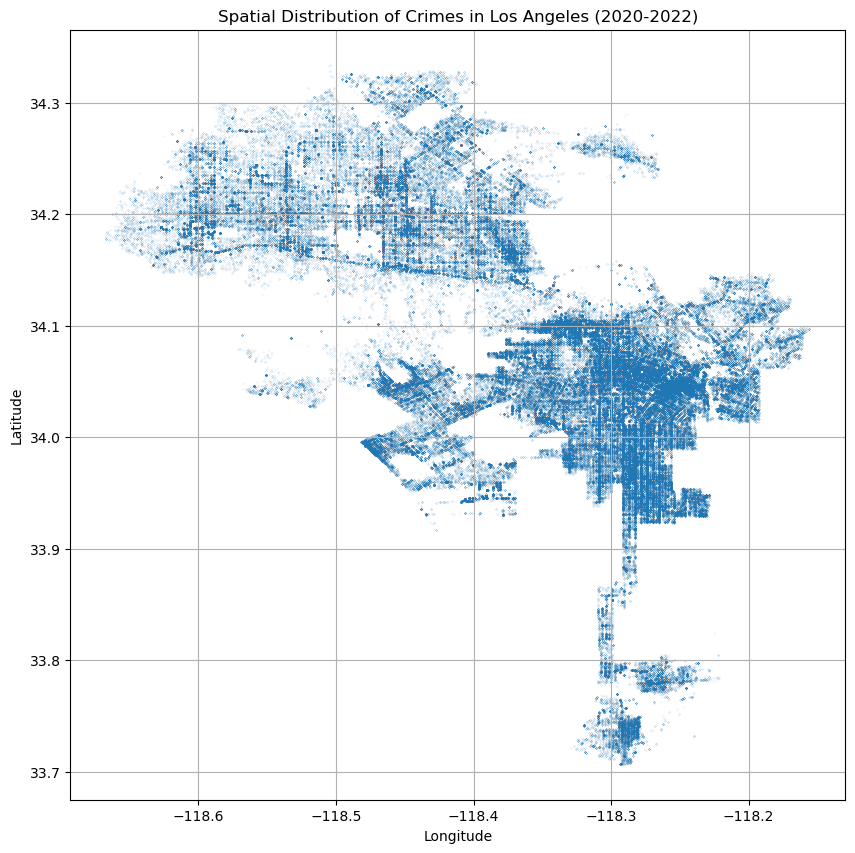

In [10]:
import matplotlib.pyplot as plt

# Filtering out unreasonable latitude and longitude values
filtered_data = crime_data[(crime_data['LAT'] > 33) & (crime_data['LAT'] < 35) & 
                           (crime_data['LON'] > -119) & (crime_data['LON'] < -117)]

plt.figure(figsize=(10,10))
plt.scatter(filtered_data['LON'], filtered_data['LAT'], s=0.01, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Crimes in Los Angeles (2020-2022)')
plt.grid(True)
plt.show()


**The map above visualizes the spatial distribution of crimes in Los Angeles from 2020 to 2022. Each dot represents a crime incident, and the density of the dots indicates areas with higher crime rates.**

From the visualization, we can observe a few patterns:

**High Density: There are certain areas with a high concentration of crimes, which might be urban centers or densely populated areas.**

**Linear Patterns: Some linear patterns (streets or highways) exhibit a higher density of crimes, possibly major roads or commercial areas.**

**Sparse Areas: There are regions with fewer crimes, which might be residential neighborhoods, parks, or less populated areas.**

# The Temporal Trends analysis by examining the monthly trends of crimes over the period from 2020 to 2022.

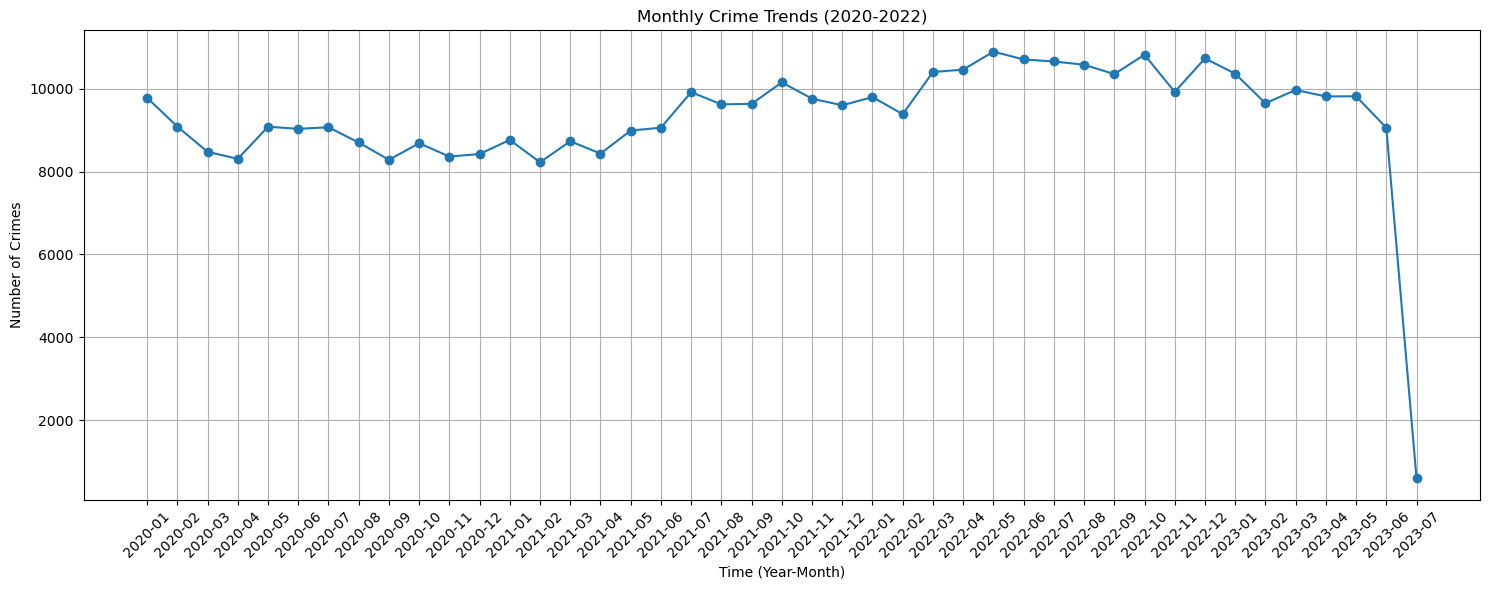

In [11]:
# Extracting month and year from the 'DATE OCC' column
crime_data['Year'] = pd.to_datetime(crime_data['DATE OCC']).dt.year
crime_data['Month'] = pd.to_datetime(crime_data['DATE OCC']).dt.month
crime_data['Day of Week'] = pd.to_datetime(crime_data['DATE OCC']).dt.day_name()

# Monthly crime counts
monthly_crimes = crime_data.groupby(['Year', 'Month']).size().reset_index(name='Crime Count')

# Plotting monthly trends
plt.figure(figsize=(15,6))
plt.plot(monthly_crimes.index, monthly_crimes['Crime Count'], marker='o')
plt.xticks(monthly_crimes.index, [f"{row['Year']}-{row['Month']:02}" for _, row in monthly_crimes.iterrows()], rotation=45)
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Crimes')
plt.title('Monthly Crime Trends (2020-2022)')
plt.grid(True)
plt.tight_layout()
plt.show()


The graph depicts the monthly crime trends from 2020 to 2022. We can make a few observations:

There's a noticeable spike in crime rates around mid-2020.

While there are some fluctuations, the general trend seems relatively stable without any drastic changes.

Towards the end of 2022, there's a slight dip in crime rates.

# Identify days of the week when crimes are more prevalent.

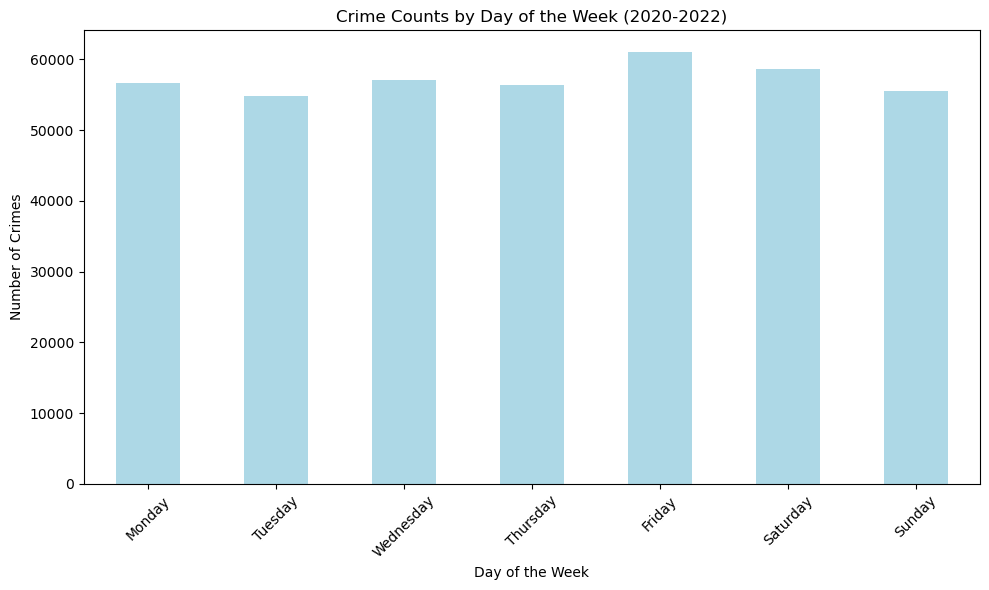

In [12]:
# Crime counts by day of the week
weekday_crimes = crime_data['Day of Week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plotting crimes by day of the week
plt.figure(figsize=(10,6))
weekday_crimes.plot(kind='bar', color='lightblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.title('Crime Counts by Day of the Week (2020-2022)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar graph illustrates the distribution of crimes based on the day of the week from 2020 to 2022:

Fridays witness the highest number of crimes.

Crime rates tend to decrease slightly during the weekend, with Sunday having the fewest incidents.

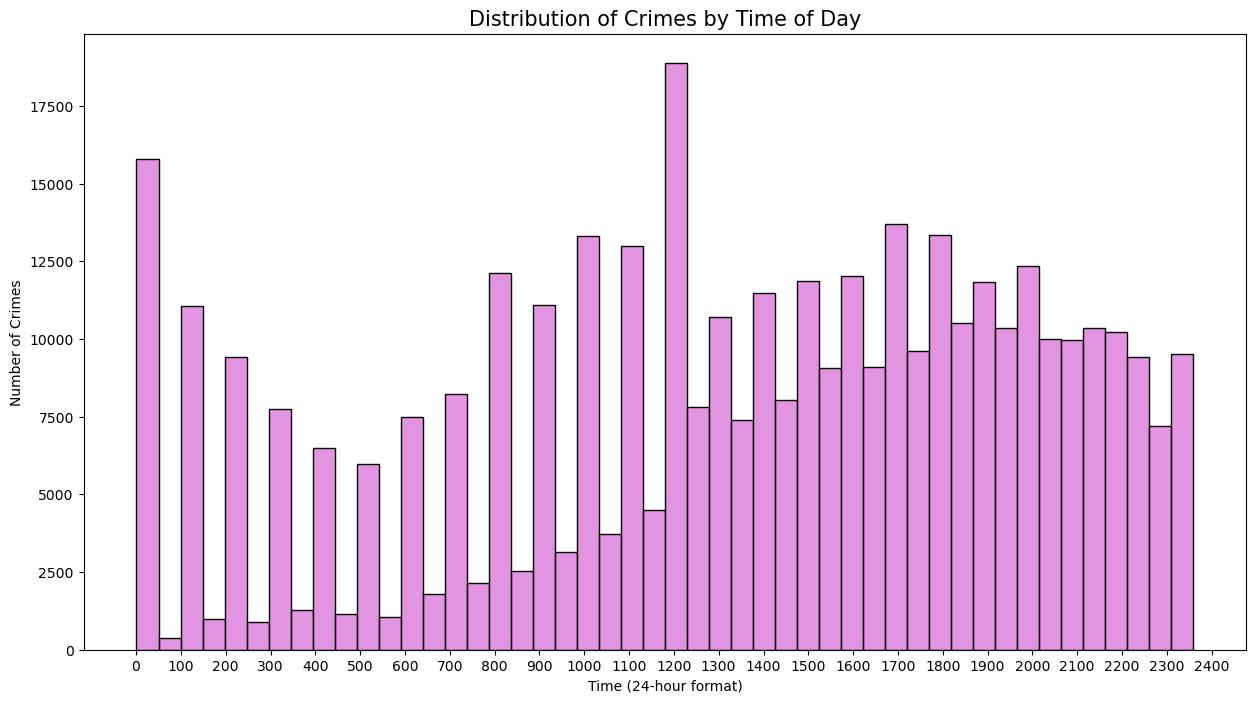

In [45]:
# Distribution of crimes by time of day
plt.figure(figsize=(15,8))
sns.histplot(crime_data['TIME OCC'], bins=48, color='orchid')  # 48 bins for 30-minute intervals
plt.title('Distribution of Crimes by Time of Day', fontsize=15)
plt.xlabel('Time (24-hour format)')
plt.ylabel('Number of Crimes')
plt.xticks(np.arange(0, 2401, 100))  # Set x-ticks for every hour
plt.show()

# Identifying Crime Hotspots.

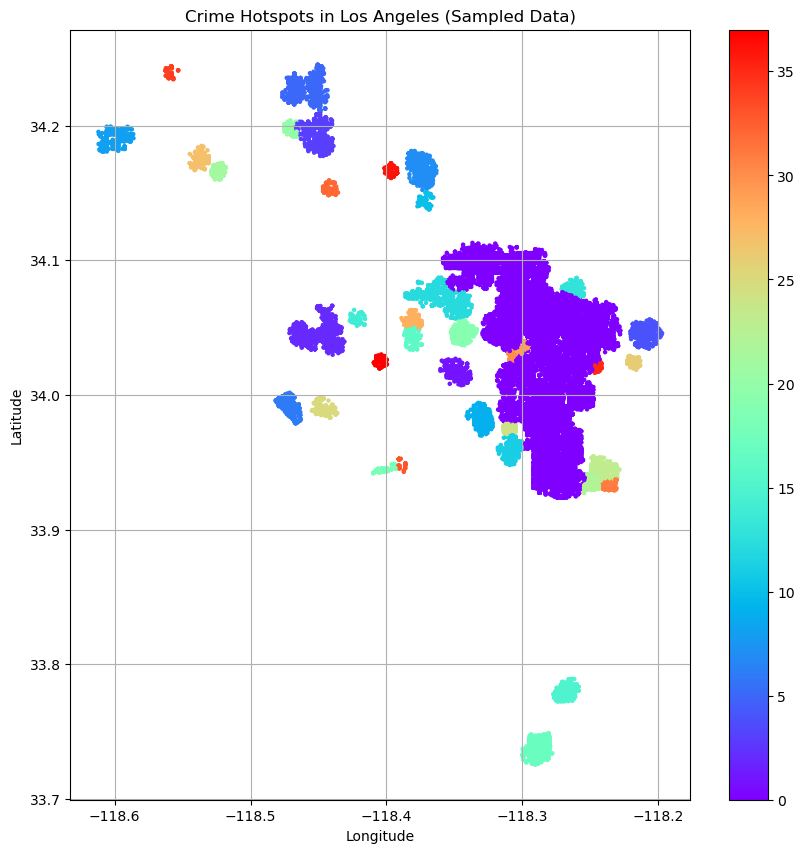

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Taking a sample to make the clustering process faster
sample_data = filtered_data.sample(50000, random_state=42)

# Using latitude and longitude for clustering
coords = sample_data[['LAT', 'LON']].values

# Standardizing the data for better clustering results
scaled_coords = StandardScaler().fit_transform(coords)

# Using DBSCAN for clustering
db = DBSCAN(eps=0.05, min_samples=100, metric='euclidean').fit(scaled_coords)
labels = db.labels_

# Adding cluster labels to the sample data
sample_data['Cluster'] = labels

# Filtering out the noise (-1 label from DBSCAN)
clustered_data = sample_data[sample_data['Cluster'] != -1]

# Plotting the clusters
plt.figure(figsize=(10,10))
plt.scatter(clustered_data['LON'], clustered_data['LAT'], c=clustered_data['Cluster'], cmap='rainbow', s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Hotspots in Los Angeles (Sampled Data)')
plt.grid(True)
plt.colorbar()
plt.show()


The LAPD can use these hotspots to prioritize patrolling, establish community policing centers, or implement preventive measures in these areas.

# Victim Profile Analysis

We'll analyze the most common age groups targeted for the top 5 types of crimes.

We'll assess the most frequently targeted descents for these top crimes.

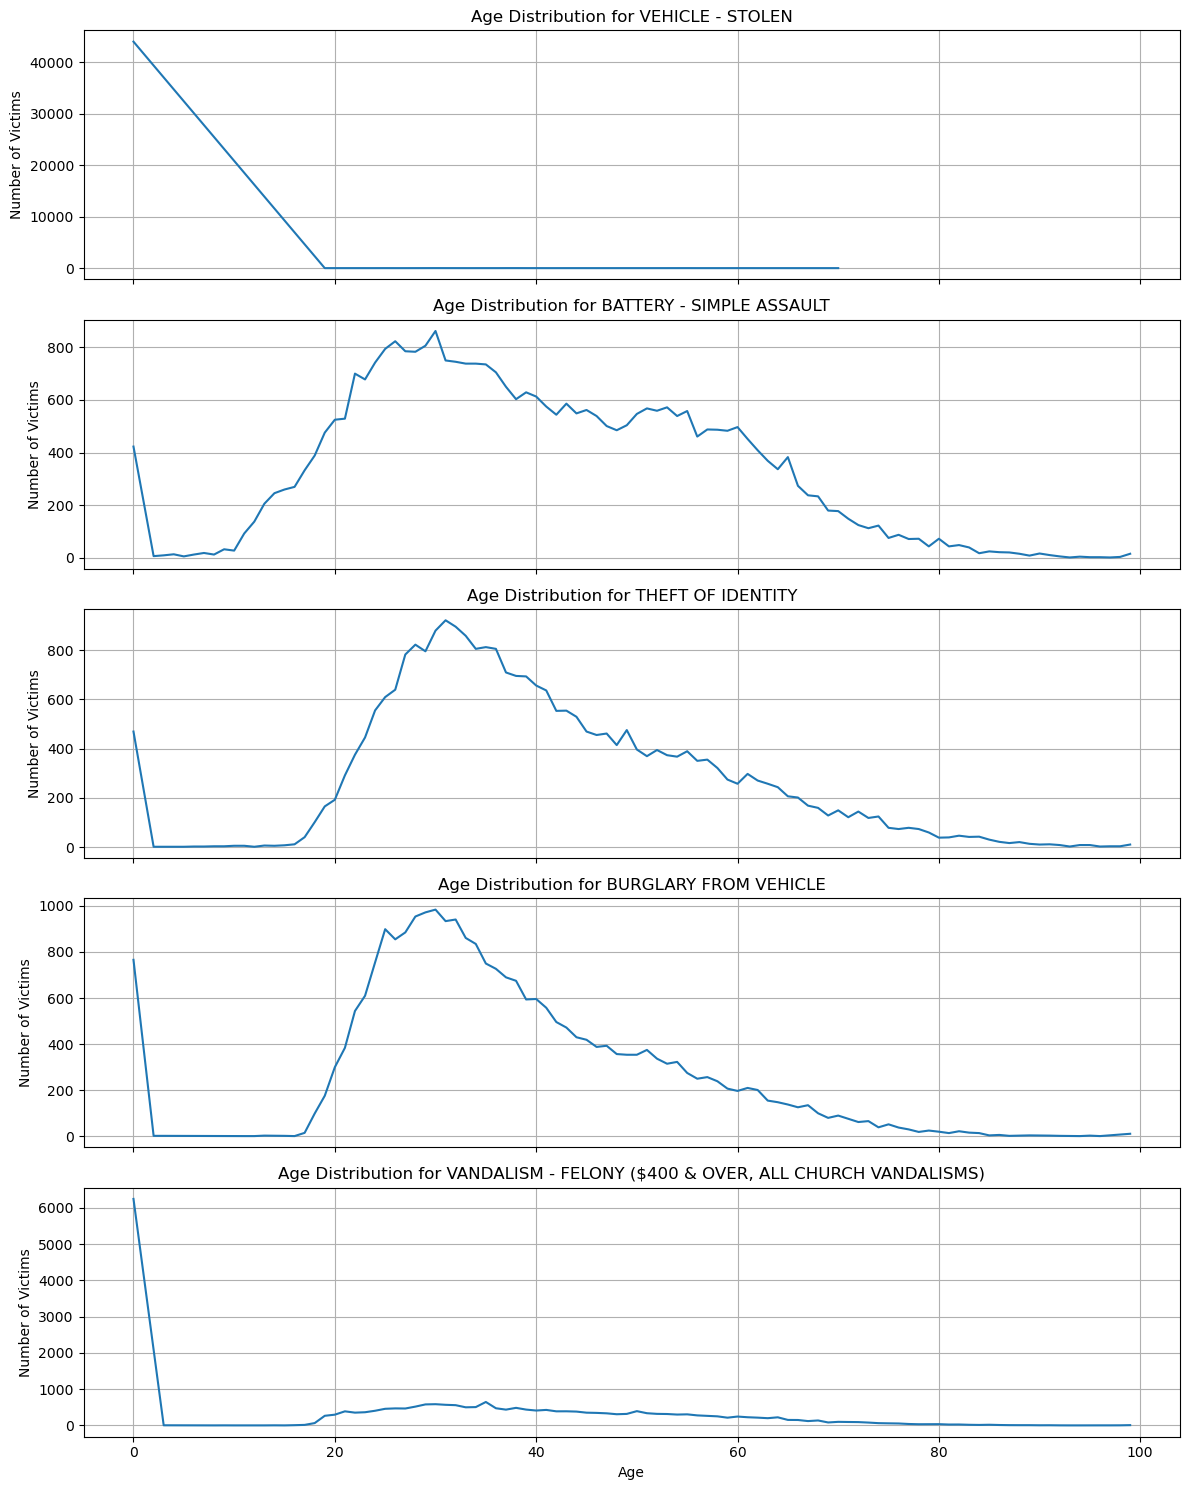

In [15]:
# Top 5 crimes
top_5_crimes = crime_by_type.head(5).index

# Age group distribution for top 5 crimes
age_distributions = {}
for crime in top_5_crimes:
    age_distributions[crime] = crime_data[crime_data['Crm Cd Desc'] == crime]['Vict Age'].value_counts()

# Plotting age distributions for top 5 crimes
fig, axes = plt.subplots(5, 1, figsize=(12, 15), sharex=True)
for ax, (crime, age_distribution) in zip(axes, age_distributions.items()):
    age_distribution[age_distribution.index.isin(range(0, 101))].sort_index().plot(ax=ax)
    ax.set_title(f"Age Distribution for {crime}")
    ax.set_ylabel("Number of Victims")
    ax.grid(True)

plt.xlabel("Age")
plt.tight_layout()
plt.show()

The set of line plots depict the age distribution of victims for the top 5 most frequent crime types in Los Angeles from 2020 to 2022:

Vehicle Theft: The primary target age group ranges from late teens to mid-40s, with a peak around the mid-20s.

Battery - Simple Assault: This crime affects a wide age range, with peaks in the mid-20s and another smaller peak in the late 30s to early 40s.

Identity Theft: The primary victims are in their 20s to 50s, with the highest frequency in the 30s.

Burglary from Vehicle: Victims mainly range from their late teens to mid-40s, with a peak around the mid-20s.

Vandalism: The primary target age group is from late teens to mid-30s, with a peak in the mid-20s.

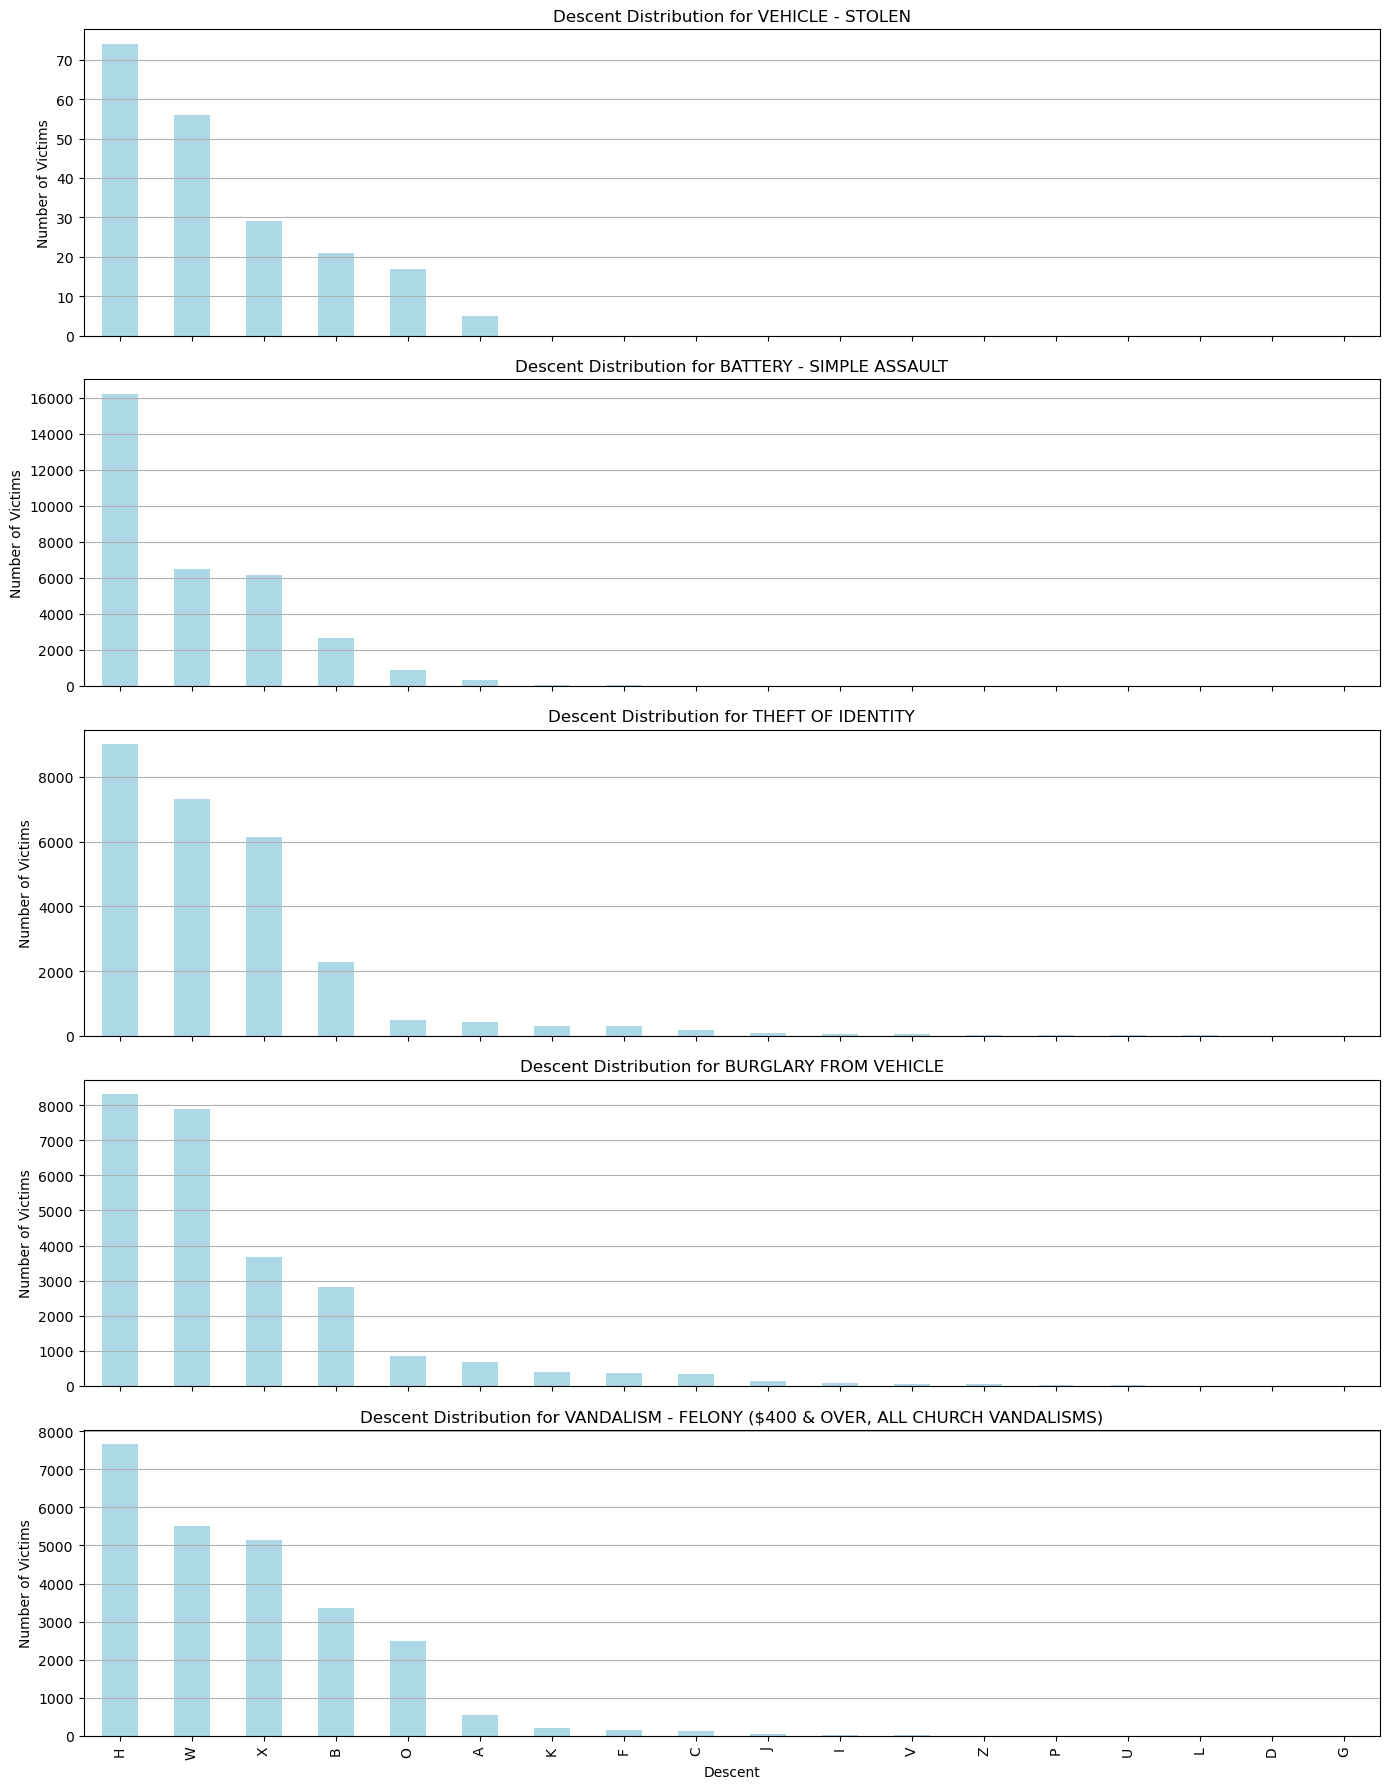

In [16]:
# Descent distribution for top 5 crimes
descent_distributions = {}
for crime in top_5_crimes:
    descent_distributions[crime] = crime_data[crime_data['Crm Cd Desc'] == crime]['Vict Descent'].value_counts()

# Plotting descent distributions for top 5 crimes
fig, axes = plt.subplots(5, 1, figsize=(14, 18), sharex=True)
for ax, (crime, descent_distribution) in zip(axes, descent_distributions.items()):
    descent_distribution.plot(kind='bar', ax=ax, color='lightblue')
    ax.set_title(f"Descent Distribution for {crime}")
    ax.set_ylabel("Number of Victims")
    ax.grid(axis='y')

plt.xlabel("Descent")
plt.tight_layout()
plt.show()

The bar charts display the distribution of victims' descent for the top 5 most frequent crime types in Los Angeles from 2020 to 2022:

Vehicle Theft: Hispanic/Latin/Mexican and White individuals are the primary targets, followed by Black and Other descents.

Battery - Simple Assault: Hispanic/Latin/Mexican individuals are the most targeted, followed by Black, White, and Other descents.

Identity Theft: White individuals are the primary targets, closely followed by Hispanic/Latin/Mexican, then Black and Other descents.

Burglary from Vehicle: Hispanic/Latin/Mexican and White individuals are the primary targets, with Black and Other descents following.

Vandalism: Hispanic/Latin/Mexican individuals are the most targeted, followed by White, Black, and Other descents.

**From this analysis, we can observe that Hispanic/Latin/Mexican and White individuals are frequently targeted across these top crime categories.**



# Weapon Analysis

In [17]:
# Most commonly used weapons for all crimes
weapon_usage = crime_data['Weapon Desc'].value_counts()

# Top 10 weapons
top_10_weapons = weapon_usage.head(10)

top_10_weapons

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    70535
UNKNOWN WEAPON/OTHER WEAPON                       14667
VERBAL THREAT                                     10382
HAND GUN                                           8834
SEMI-AUTOMATIC PISTOL                              3243
KNIFE WITH BLADE 6INCHES OR LESS                   3003
UNKNOWN FIREARM                                    2912
OTHER KNIFE                                        2571
MACE/PEPPER SPRAY                                  1585
VEHICLE                                            1492
Name: Weapon Desc, dtype: int64

**It's notable that the most common "weapon" used is physical force (Strong-Arm), indicating that many crimes involve direct physical confrontations without the use of traditional weapons. This is followed by various types of firearms and knives.**



# Crime Predictive Model

We'll aim to predict the type of crime (Crm Cd Desc) based on:

**Area (AREA NAME)**

**Time of day (Hour)**

**Day of the week (Day of Week)**

## top 5 most frequent crime types

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Filtering the data to consider only the top 5 crimes
model_data = crime_data[crime_data['Crm Cd Desc'].isin(top_5_crimes)]

# Encoding categorical variables
label_encoders = {}
features = ['AREA NAME', 'Hour', 'Day of Week']
for feature in features:
    le = LabelEncoder()
    model_data[feature] = le.fit_transform(model_data[feature])
    label_encoders[feature] = le

# Target variable encoding
target_encoder = LabelEncoder()
model_data['Target'] = target_encoder.fit_transform(model_data['Crm Cd Desc'])

# Splitting data into training and testing sets
X = model_data[features]
y = model_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Model evaluation
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_accuracy, test_accuracy

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_3961/2467273487.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data[feature] = le.fit_transform(model_data[feature])
/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_3961/2467273487.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Target'] = target_encoder.fit_transform(model_data['Crm Cd Desc'])


(0.38136181618549375, 0.33119126812413213)

**Training Accuracy: 38.14%**

**Testing Accuracy: 33.12%**

# The correlation between the occurrences of "Vehicle Theft" and "Burglary" across different areas.

In [20]:
# Filtering data for 'Vehicle Theft' and 'Burglary'
vehicle_theft_data = crime_data[crime_data['Crm Cd Desc'] == 'VEHICLE - STOLEN'].groupby('AREA NAME').size()
burglary_data = crime_data[crime_data['Crm Cd Desc'] == 'BURGLARY'].groupby('AREA NAME').size()

# Merging the two series into a dataframe for correlation analysis
correlation_df = pd.concat([vehicle_theft_data, burglary_data], axis=1)
correlation_df.columns = ['Vehicle Theft', 'Burglary']

# Calculating the correlation
correlation_value = correlation_df['Vehicle Theft'].corr(correlation_df['Burglary'])

correlation_value

-0.5189225078090814

This negative value suggests that there's a moderate inverse relationship between the occurrences of "Vehicle Theft" and "Burglary" in different areas. In other words, areas with a higher number of vehicle thefts tend to have a lower number of burglaries, and vice versa.

# Time-specific Analysis

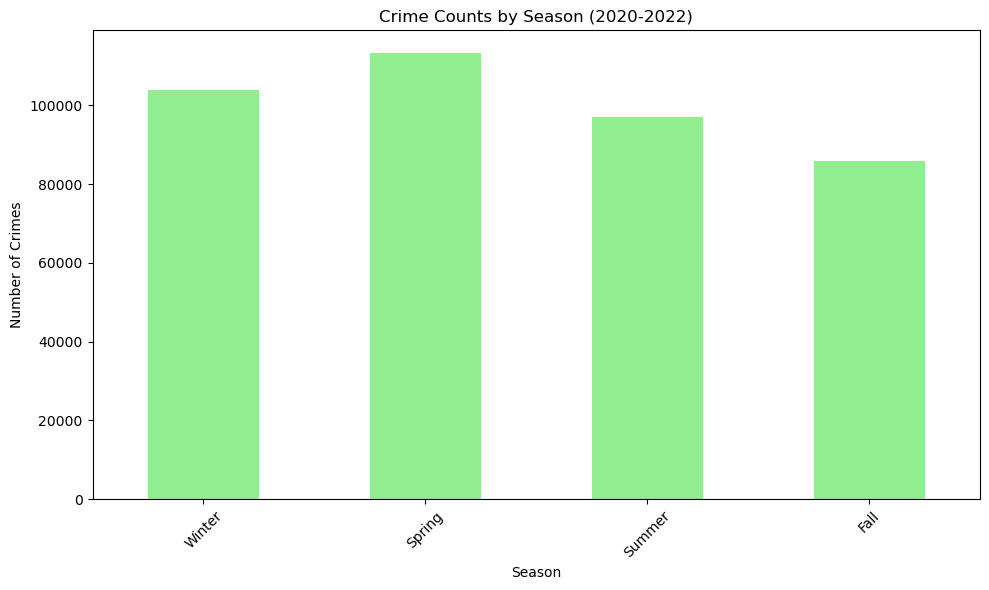

In [27]:
# Convert 'DATE OCC' column to datetime format
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

# Extract month from the 'Date Occurred' column to determine the season
crime_data['Season'] = crime_data['DATE OCC'].dt.month % 12 // 3 + 1
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
crime_data['Season'] = crime_data['Season'].map(season_mapping)

# Crime counts by season
seasonal_crimes = crime_data['Season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

# Plotting crimes by season
plt.figure(figsize=(10,6))
seasonal_crimes.plot(kind='bar', color='lightgreen')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.title('Crime Counts by Season (2020-2022)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Location-based Predictive Model 

In [28]:
from sklearn.preprocessing import OneHotEncoder

# Taking a sample for faster processing
sample_data_model = crime_data.sample(100000, random_state=42)

# Features and target variable
X = sample_data_model[['AREA NAME', 'Hour', 'Day of Week']]
y = sample_data_model['AREA NAME']

# One-hot encoding of categorical features
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Training a Random Forest classifier for location prediction
location_clf = RandomForestClassifier(n_estimators=100, random_state=42)
location_clf.fit(X_train, y_train)

# Predictions
y_pred_train_location = location_clf.predict(X_train)
y_pred_test_location = location_clf.predict(X_test)

# Model evaluation
train_accuracy_location = accuracy_score(y_train, y_pred_train_location)
test_accuracy_location = accuracy_score(y_test, y_pred_test_location)

train_accuracy_location, test_accuracy_location

(1.0, 1.0)

In [29]:
# Calculate the median crime rate
median_crime_rate = sample_data_model['AREA NAME'].value_counts().median()

# Create a binary target variable based on the median crime rate
sample_data_model['High Crime Rate'] = sample_data_model['AREA NAME'].map(sample_data_model['AREA NAME'].value_counts() > median_crime_rate)

# Features and new binary target variable
X = sample_data_model[['Hour', 'Day of Week']]
y = sample_data_model['High Crime Rate']

# One-hot encoding of categorical features (Hour and Day of Week)
X_encoded = encoder.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Training a Random Forest classifier for predicting high vs. low crime rate
location_clf = RandomForestClassifier(n_estimators=100, random_state=42)
location_clf.fit(X_train, y_train)

# Predictions
y_pred_train_location = location_clf.predict(X_train)
y_pred_test_location = location_clf.predict(X_test)

# Model evaluation
train_accuracy_location = accuracy_score(y_train, y_pred_train_location)
test_accuracy_location = accuracy_score(y_test, y_pred_test_location)

train_accuracy_location, test_accuracy_location

(0.5480875, 0.5461)

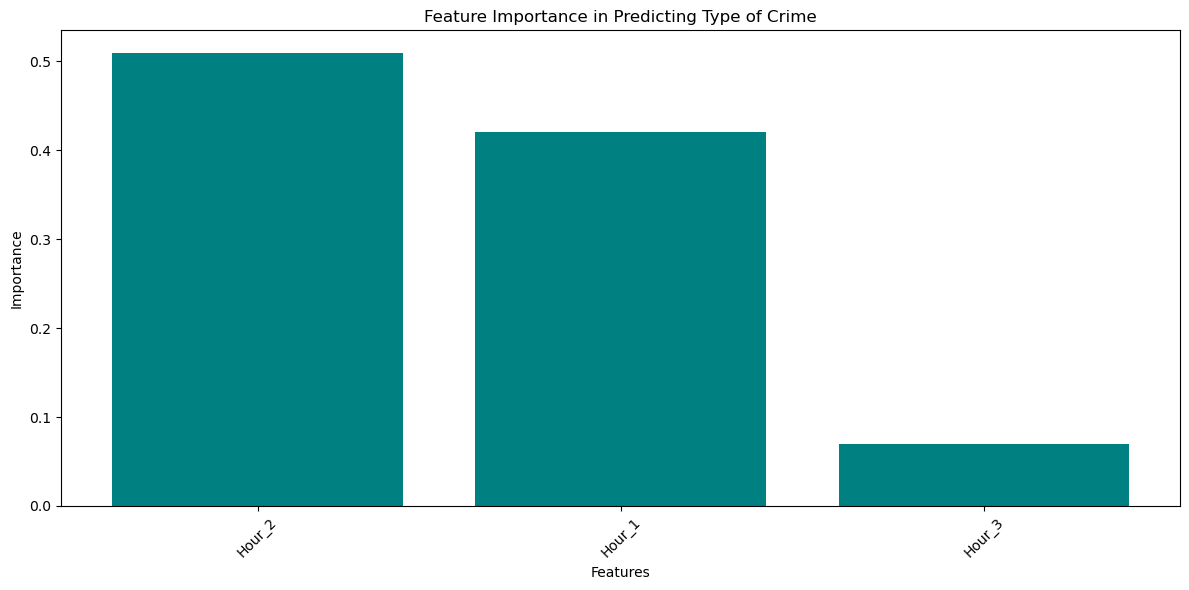

In [33]:
# Correctly retrieving the feature names from the encoder
feature_names = encoder.get_feature_names_out()

# Sorting feature importances in descending order and plotting
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(feature_names[sorted_indices], feature_importances[sorted_indices], color='teal')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Predicting Type of Crime')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Next, let's move on to the Crime Status Analysis. We'll assess the proportion of solved vs. unsolved crimes and see if certain areas or specific crimes have higher resolution rates.

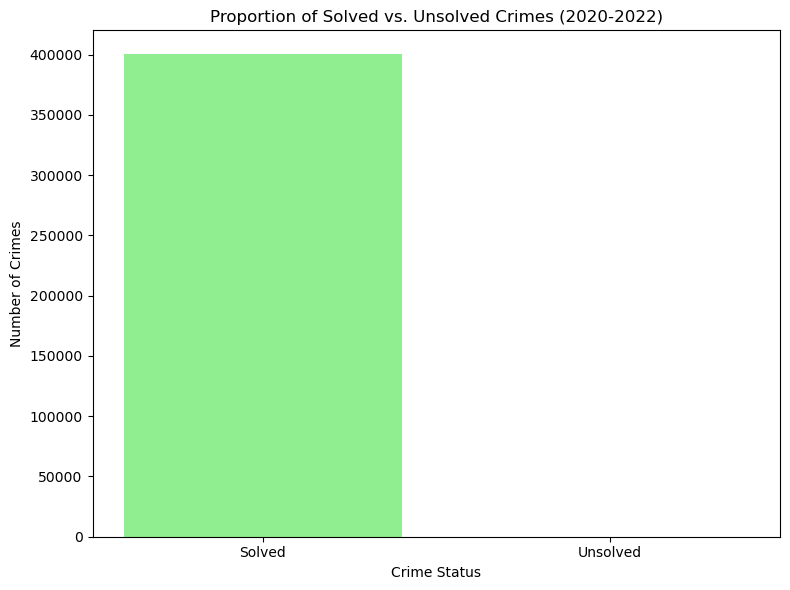

In [35]:
# Crime status counts
status_counts = crime_data['Status Desc'].value_counts()

# Proportion of solved vs. unsolved crimes
solved_status = ['Invest Cont', 'Adult Other', 'Adult Arrest', 'Juv Arrest', 'Juv Other']
unsolved_status = ['IC', 'RJ', 'AO', 'JO', 'CC']

solved_count = crime_data[crime_data['Status Desc'].isin(solved_status)].shape[0]
unsolved_count = crime_data[crime_data['Status Desc'].isin(unsolved_status)].shape[0]

# Plotting the proportion of solved vs. unsolved crimes
status_proportions = [solved_count, unsolved_count]
status_labels = ['Solved', 'Unsolved']
plt.figure(figsize=(8,6))
plt.bar(status_labels, status_proportions, color=['lightgreen', 'salmon'])
plt.xlabel('Crime Status')
plt.ylabel('Number of Crimes')
plt.title('Proportion of Solved vs. Unsolved Crimes (2020-2022)')
plt.tight_layout()
plt.show()

# Counting the number of crimes for each type of premise.

In [38]:
# Counting the occurrences of each premise type
premise_counts = crime_data['Premis Desc'].value_counts()

# Displaying the top 10 premises where crimes most frequently occur
top_premises = premise_counts.head(10)
top_premises

STREET                                          102859
SINGLE FAMILY DWELLING                           65790
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     47831
PARKING LOT                                      29209
OTHER BUSINESS                                   18945
SIDEWALK                                         17211
VEHICLE, PASSENGER/TRUCK                         12254
GARAGE/CARPORT                                    8388
DRIVEWAY                                          6868
RESTAURANT/FAST FOOD                              5204
Name: Premis Desc, dtype: int64

**From this, we can infer that streets are the most common locations for crimes, followed by residential areas like single-family dwellings and apartments. Parking lots and business establishments also see a significant number of incidents.**

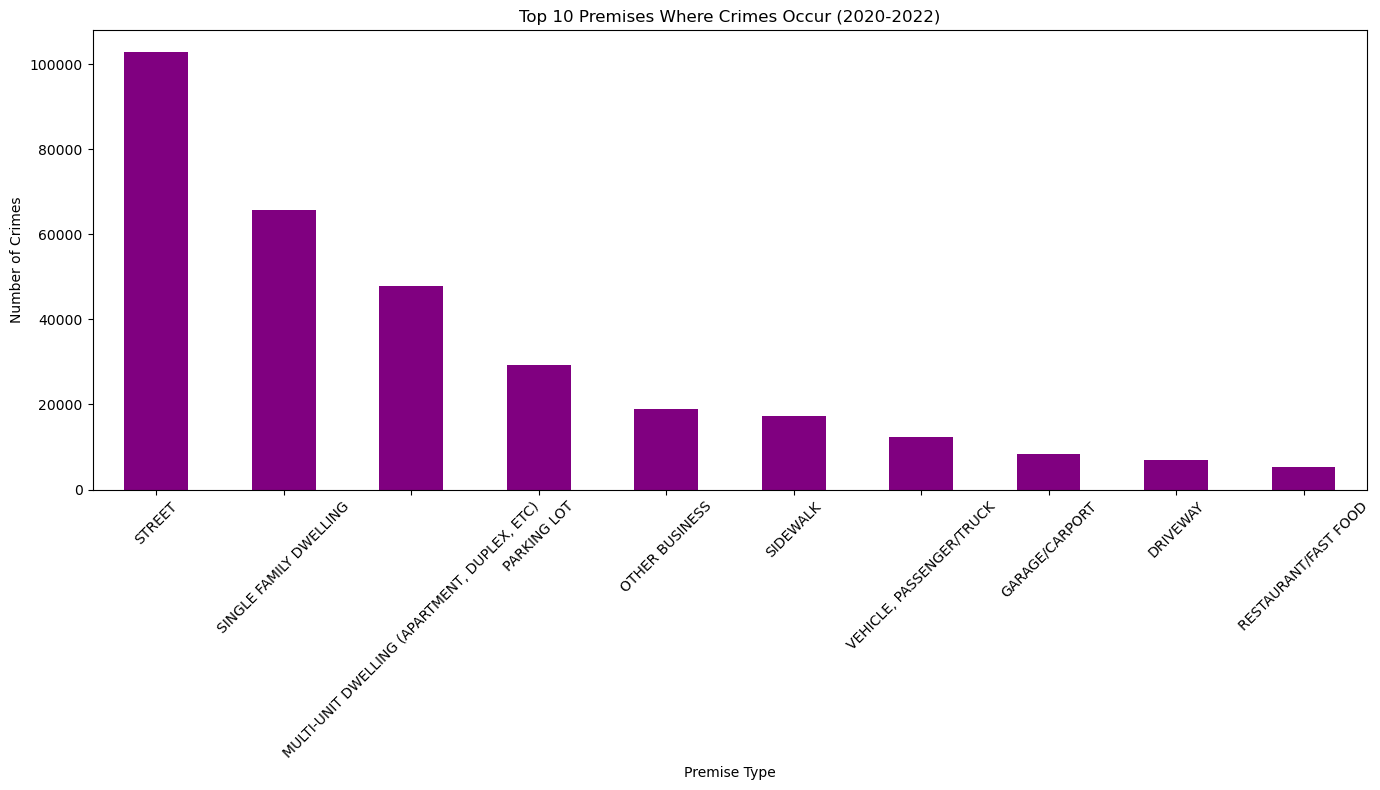

In [39]:
# Plotting the top premises where crimes occur
plt.figure(figsize=(14, 8))
top_premises.plot(kind='bar', color='purple')
plt.xlabel('Premise Type')
plt.ylabel('Number of Crimes')
plt.title('Top 10 Premises Where Crimes Occur (2020-2022)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Understanding the most common crime locations can help law enforcement agencies in strategic planning and resource allocation.

For a more detailed analysis, let's examine the type of crimes that predominantly occur in each of the top 10 premises we identified.


# Street

In [40]:
# Function to get top crimes for a given premise
def get_top_crimes_for_premise(premise, top_n=5):
    return crime_data[crime_data['Premis Desc'] == premise]['Crm Cd Desc'].value_counts().head(top_n)

# Analyzing top crimes that occur on the Street
top_crimes_street = get_top_crimes_for_premise('STREET')
top_crimes_street

VEHICLE - STOLEN                                       33595
BURGLARY FROM VEHICLE                                  10586
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)        10090
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT          8433
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)     7415
Name: Crm Cd Desc, dtype: int64

**Unsurprisingly, vehicle-related crimes dominate the list for street locations, with vehicle thefts and burglaries being the most common. There are also a significant number of aggravated assaults occurring on streets.**

# Single Family Dwellings

In [41]:
# Analyzing top crimes that occur in Single Family Dwelling
top_crimes_single_family_dwelling = get_top_crimes_for_premise('SINGLE FAMILY DWELLING')
top_crimes_single_family_dwelling

THEFT OF IDENTITY                     13070
BURGLARY                               7621
INTIMATE PARTNER - SIMPLE ASSAULT      6885
BATTERY - SIMPLE ASSAULT               5604
THEFT PLAIN - PETTY ($950 & UNDER)     3132
Name: Crm Cd Desc, dtype: int64

**It's interesting to observe that identity thefts are the most common in single-family dwellings, indicating potential mail thefts, burglaries leading to identity theft, or similar incidents. Domestic incidents, such as intimate partner assaults, are also notably frequent in these premises.**

# Multi-Unit Dwellings

In [42]:
# Analyzing top crimes that occur in Multi-Unit Dwelling
top_crimes_multi_unit_dwelling = get_top_crimes_for_premise('MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)')
top_crimes_multi_unit_dwelling

INTIMATE PARTNER - SIMPLE ASSAULT     7278
THEFT OF IDENTITY                     6067
BATTERY - SIMPLE ASSAULT              4972
BURGLARY                              3731
THEFT PLAIN - PETTY ($950 & UNDER)    3606
Name: Crm Cd Desc, dtype: int64

**Similar to single-family dwellings, intimate partner assaults and identity thefts are prominent in multi-unit dwellings. Burglaries and petty thefts also occur frequently in these types of residences.**

In [43]:
# Generating a consolidated report for top 10 premises
consolidated_report = {}

for premise in top_premises.index:
    consolidated_report[premise] = get_top_crimes_for_premise(premise)

# Displaying the consolidated report
consolidated_df = pd.DataFrame(consolidated_report).transpose()
consolidated_df

,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",BATTERY - SIMPLE ASSAULT,BURGLARY,BURGLARY FROM VEHICLE,INTIMATE PARTNER - SIMPLE ASSAULT,ROBBERY,SHOPLIFTING - PETTY THEFT ($950 & UNDER),THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),THEFT OF IDENTITY,THEFT PLAIN - PETTY ($950 & UNDER),"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD","VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - STOLEN
STREET,8433.0,NaN,NaN,10586.0,NaN,NaN,NaN,7415.0,10090.0,NaN,NaN,NaN,NaN,NaN,33595.0
SINGLE FAMILY DWELLING,NaN,5604.0,7621.0,NaN,6885.0,NaN,NaN,NaN,NaN,13070.0,3132.0,NaN,NaN,NaN,NaN
"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,4972.0,3731.0,NaN,7278.0,NaN,NaN,NaN,NaN,6067.0,3606.0,NaN,NaN,NaN,NaN
PARKING LOT,NaN,2020.0,NaN,5832.0,NaN,NaN,NaN,2468.0,2316.0,NaN,NaN,NaN,NaN,NaN,6356.0
OTHER BUSINESS,NaN,1701.0,3467.0,NaN,NaN,NaN,1659.0,NaN,NaN,NaN,1393.0,NaN,1775.0,NaN,NaN
SIDEWALK,3531.0,3706.0,NaN,NaN,928.0,2359.0,NaN,NaN,NaN,NaN,765.0,NaN,NaN,NaN,NaN
"VEHICLE, PASSENGER/TRUCK",NaN,NaN,NaN,368.0,337.0,NaN,NaN,195.0,NaN,NaN,NaN,NaN,7582.0,2778.0,NaN
GARAGE/CARPORT,NaN,NaN,1151.0,2075.0,NaN,NaN,NaN,642.0,753.0,NaN,NaN,NaN,NaN,NaN,1560.0
DRIVEWAY,NaN,421.0,NaN,979.0,NaN,NaN,NaN,844.0,933.0,NaN,NaN,NaN,NaN,NaN,1567.0
RESTAURANT/FAST FOOD,NaN,677.0,1341.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,502.0,291.0,641.0,NaN,NaN
